## Summary

This project involves an exploratory data analysis (EDA) of a Zomato dataset, centered on restaurants in Bengaluru. The analysis includes data cleaning, feature engineering, and visualizations to extract meaningful insights. Key areas of focus include restaurant ratings, types, cuisines, and customer behaviors. The study uncovers trends such as the growing popularity of quick bites and the influence of online ordering on customer ratings, providing a deeper understanding of the dining landscape in Bengaluru.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('zomato.csv')

In [5]:
df.duplicated().sum()

0

Check dataframes inside like unique value and value Dtype

In [7]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

Drop unrelated column from dataframes

In [9]:
df.drop(columns=['url','address','phone', 'dish_liked','reviews_list', 'menu_item'], inplace=True)

In [10]:
df


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


Rename column name as per your reuquirement

In [13]:
df.rename(columns = {'approx_cost(for two people)':'Person_cost','list_in(type)': 'Listed_type', 'listed_in(city)': 'list_Location'}, inplace=True)

In [14]:
df


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Person_cost,listed_in(type),list_Location
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [15]:
df.rename(columns = {'listed_in(type)': 'Listed_type','Person_cost':'TwoPerson_cost'}, inplace=True)

In [16]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,TwoPerson_cost,Listed_type,list_Location
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


Replace unrelated column from rate column. also change datatype in float.

In [18]:
df.rate = df.rate.str.replace('-', '')
df.rate = df.rate.str.replace('NEW', '')
df.rate = df.rate.str.replace('/5', '')

In [19]:
df.rate.value_counts()

rate
        2277
3.9     2098
3.8     2022
3.7     2011
3.9     1874
        ... 
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: count, Length: 63, dtype: int64

In [20]:
df[df.rate == "''"]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,TwoPerson_cost,Listed_type,list_Location


In [21]:
df.rate.isnull().sum()

7775

In [22]:
df.rate

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     NaN
51714     NaN
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [23]:
df[df.rate.apply(lambda x: type(x) == str)]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,TwoPerson_cost,Listed_type,list_Location
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [24]:
df.rate= df.rate.replace("''", np.nan)

In [25]:
df.rate = pd.to_numeric(df.rate, errors='coerce')

In [26]:
df.describe()

,rate,votes
count,41665.000000,51717.000000
mean,3.700449,283.697527
std,0.440513,803.838853
min,1.800000,0.000000
25%,3.400000,7.000000
50%,3.700000,41.000000
75%,4.000000,198.000000
max,4.900000,16832.000000


In [27]:
df.rate.isnull().sum()

10052

In [28]:
df.rate.fillna(df.rate.mean(), inplace=True)

check null value in dataframes

In [30]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location           21
rest_type         227
cuisines           45
TwoPerson_cost    346
Listed_type         0
list_Location       0
dtype: int64

In [31]:
df[df.location.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,TwoPerson_cost,Listed_type,list_Location
1662,Papa Khan Rasoi,No,No,3.700449,0,NaN,NaN,NaN,NaN,Delivery,Bannerghatta Road
9874,Papa Khan Rasoi,No,No,3.700449,0,NaN,NaN,NaN,NaN,Delivery,BTM
13693,Mohabbat Desi Restaurant,No,No,3.700449,0,NaN,NaN,NaN,NaN,Delivery,Electronic City
16351,Desi Chatkara,No,No,3.700449,0,NaN,NaN,NaN,NaN,Delivery,HSR
26432,New Taj Biryani Centre,No,No,3.700449,0,NaN,NaN,NaN,NaN,Dine-out,Kammanahalli
26519,AB's - Absolute Barbecues,No,No,3.700449,0,NaN,NaN,NaN,NaN,Buffet,Koramangala 4th Block
27672,Manchow,No,No,3.700449,0,NaN,NaN,NaN,NaN,Delivery,Koramangala 4th Block
28611,Manchow,No,No,3.700449,0,NaN,NaN,NaN,NaN,Dine-out,Koramangala 4th Block
29298,AB's - Absolute Barbecues,No,No,3.700449,0,NaN,NaN,NaN,NaN,Buffet,Koramangala 5th Block
30604,Manchow,No,No,3.700449,0,NaN,NaN,NaN,NaN,Delivery,Koramangala 5th Block


eliminate null value

In [33]:
df.location.fillna('unknown', inplace=True)

In [34]:
df['rate'] = df['rate'].round(1)

In [35]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type         227
cuisines           45
TwoPerson_cost    346
Listed_type         0
list_Location       0
dtype: int64

In [36]:
df.head(15)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,TwoPerson_cost,Listed_type,list_Location
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [37]:
cuisines_list = []
for cuisines in df.cuisines.dropna():
  for cuisine in cuisines.split(', '):
    cuisines_list.append(cuisine)
cuisine_counts = pd.Series(cuisines_list).value_counts()
cuisine_counts

North Indian    21085
Chinese         15547
South Indian     8644
Fast Food        8096
Biryani          6492
                ...  
Sindhi              4
Pan Asian           3
Hot dogs            3
Indian              2
Malwani             2
Name: count, Length: 107, dtype: int64

In [38]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type         227
cuisines           45
TwoPerson_cost    346
Listed_type         0
list_Location       0
dtype: int64

In [39]:
df[df.TwoPerson_cost.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,TwoPerson_cost,Listed_type,list_Location
1662,Papa Khan Rasoi,No,No,3.7,0,unknown,NaN,NaN,NaN,Delivery,Bannerghatta Road
1768,Innate,No,No,3.7,0,JP Nagar,Delivery,Beverages,NaN,Delivery,Bannerghatta Road
1795,Super Chef's (New Royal treat),No,No,3.7,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery,Bannerghatta Road
3069,Super Chef's (New Royal treat),No,No,3.7,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery,Basavanagudi
3774,The Hub - Ibis Bengaluru,No,No,3.9,237,Marathahalli,Bar,Finger Food,NaN,Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...
50940,Cinnabon,No,No,4.0,80,Whitefield,Quick Bites,"Beverages, American, Bakery",NaN,Desserts,Whitefield
51233,Mayas kitchen,No,No,3.7,0,Whitefield,Casual Dining,"South Indian, Chinese, Chettinad",NaN,Dine-out,Whitefield
51247,Mast Kalandar,No,No,2.6,76,Whitefield,Casual Dining,North Indian,NaN,Dine-out,Whitefield
51271,Karavalli Food Court,No,No,3.2,4,Whitefield,Casual Dining,South Indian,NaN,Dine-out,Whitefield


In [40]:
df.TwoPerson_cost.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: TwoPerson_cost
Non-Null Count  Dtype 
--------------  ----- 
51371 non-null  object
dtypes: object(1)
memory usage: 404.2+ KB


In [41]:
df.TwoPerson_cost.value_counts()

TwoPerson_cost
300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: count, Length: 70, dtype: int64

In [42]:
df.describe()

,rate,votes
count,51717.000000,51717.000000
mean,3.700362,283.697527
std,0.395391,803.838853
min,1.800000,0.000000
25%,3.500000,7.000000
50%,3.700000,41.000000
75%,3.900000,198.000000
max,4.900000,16832.000000


In [43]:
df['TwoPerson_cost'] = df['TwoPerson_cost'].astype(str).str.replace(',', '')
df['TwoPerson_cost'] = df['TwoPerson_cost'].astype(float)

In [44]:
df.TwoPerson_cost.fillna(df.TwoPerson_cost.mean(), inplace=True)

In [45]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type         227
cuisines           45
TwoPerson_cost      0
Listed_type         0
list_Location       0
dtype: int64

In [46]:
df[df.rest_type.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,TwoPerson_cost,Listed_type,list_Location
999,Mughlai Kitchen,Yes,No,3.5,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600.0,Delivery,Bannerghatta Road
1300,Eat & Joy Restaurant,Yes,No,3.0,7,JP Nagar,NaN,"Fast Food, Finger Food",300.0,Delivery,Bannerghatta Road
1376,Kababish Restaurant,Yes,No,3.6,15,BTM,NaN,"North Indian, Chinese, Arabian",700.0,Delivery,Bannerghatta Road
1565,Goli Vada Pav No 1,No,No,3.7,0,Bannerghatta Road,NaN,"Street Food, Burger",150.0,Delivery,Bannerghatta Road
1637,Ammi's Biryani,No,No,2.4,392,Bannerghatta Road,NaN,"Biryani, North Indian",500.0,Delivery,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...
50978,Snack Itt,No,No,3.7,0,Whitefield,NaN,Bakery,200.0,Desserts,Whitefield
51130,Pindi Bangalore,Yes,No,3.7,0,Whitefield,NaN,"North Indian, Chinese, Biryani, Street Food",900.0,Dine-out,Whitefield
51195,Special Biryani House,Yes,No,3.2,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400.0,Dine-out,Whitefield
51294,Red Roost,No,No,3.7,0,Whitefield,NaN,"North Indian, South Indian",500.0,Dine-out,Whitefield


In [47]:
df.rest_type.value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

drop null value

In [49]:
df.dropna(inplace=True)

In [50]:
df.isnull().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type         0
cuisines          0
TwoPerson_cost    0
Listed_type       0
list_Location     0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51466 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            51466 non-null  object 
 1   online_order    51466 non-null  object 
 2   book_table      51466 non-null  object 
 3   rate            51466 non-null  float64
 4   votes           51466 non-null  int64  
 5   location        51466 non-null  object 
 6   rest_type       51466 non-null  object 
 7   cuisines        51466 non-null  object 
 8   TwoPerson_cost  51466 non-null  float64
 9   Listed_type     51466 non-null  object 
 10  list_Location   51466 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.7+ MB


In [52]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,TwoPerson_cost,Listed_type,list_Location
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield


In [53]:
uni_name = df['name'].unique().tolist()

In [54]:
df['name'] = df['name'].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')
unwanted_sequence = r"Ã©"
df['name'] = df['name'].str.replace(unwanted_sequence, "a", regex=False)

In [55]:
rating = pd.pivot_table(df,index='name', values='rate')

In [56]:
rating.value_counts()

rate    
3.700000    2190
3.700000     442
3.600000     439
3.500000     404
3.400000     399
            ... 
3.577500       1
3.577778       1
3.578571       1
3.579167       1
3.691304       1
Name: count, Length: 959, dtype: int64

In [57]:
rating = rating.sort_values(['rate'], ascending=False)
rating[:15]

,rate
name,
Byg Brewski Brewing Company,4.900000
Asia Kitchen By Mainland China,4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
Flechazo,4.800000
The Pizza Bakery,4.800000
O.G. Variar & Sons,4.800000
AB's - Absolute Barbecues,4.789474


In [58]:
sns.set_style('whitegrid')

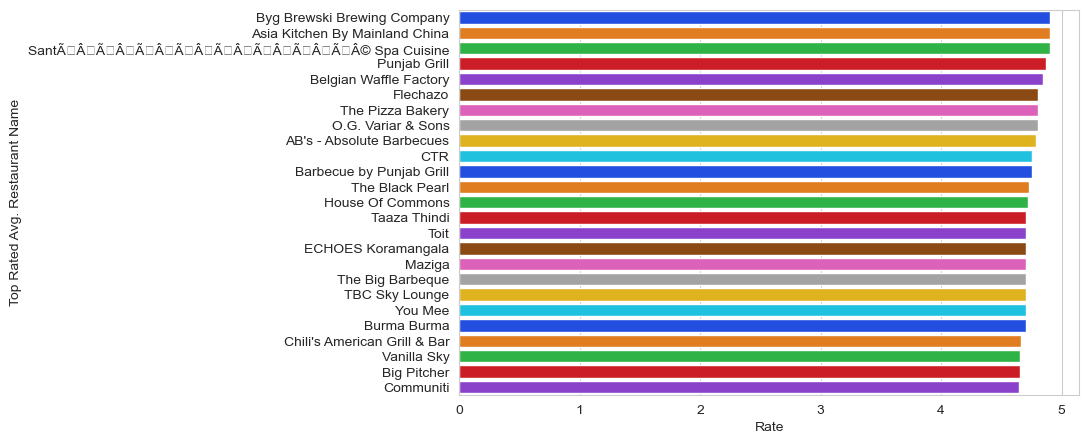

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(x= rating.rate[0:25], y=rating.index[0:25], orient='h', palette='bright')
plt.xlabel('Rate')
plt.ylabel('Top Rated Avg. Restaurant Name')
plt.show()

* According to the boxplot, Spa Cuisine, Asia Kitchen by Mainland China, and Byg Brewski Brewing Company are the top average-rated restaurants

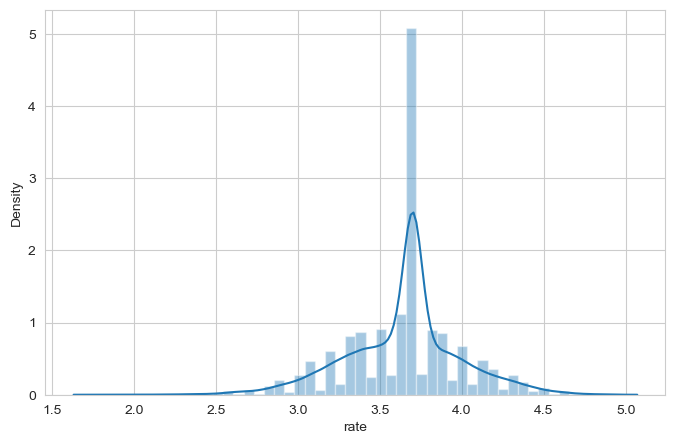

In [162]:
plt.figure(figsize=(8,5))
sns.distplot(rating['rate'])
plt.show()

* According to the distribution plot, the maximum rating given by customers to restaurants is between 3.0 and 4.0.

In [63]:
df.name.value_counts().sort_values(ascending=False)

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Srinidhi Donne Biryani                                      1
'Brahmins' Thatte Idli                                      1
S.L.V. Chats Corner                                         1
A-one Dum Biryani                                           1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8755, dtype: int64

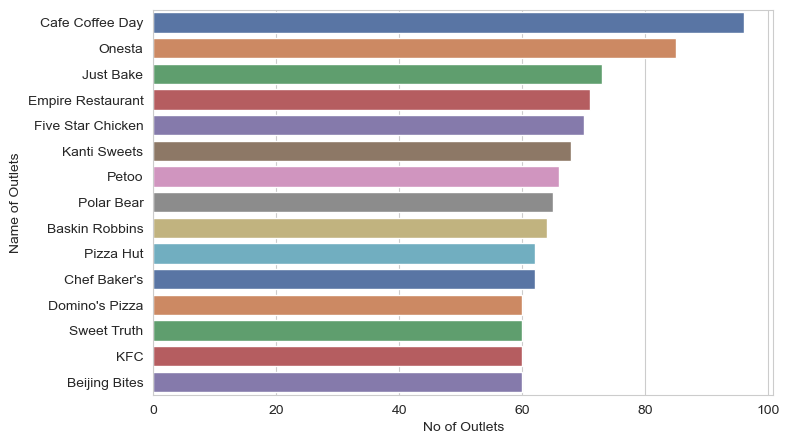

In [64]:
res_chain = df.name.value_counts().sort_values(ascending=False)[0:15]
plt.figure(figsize=(8,5))
sns.barplot(x=res_chain.values, y=res_chain.index, palette='deep', orient='h')
plt.xlabel("No of Outlets")
plt.ylabel('Name of Outlets')
plt.show()

* According to the boxplot, the maximum number of restaurants in the restaurant chain is Café Coffee Day, with a value of 96.

How Many Restaurants don't accept online orders

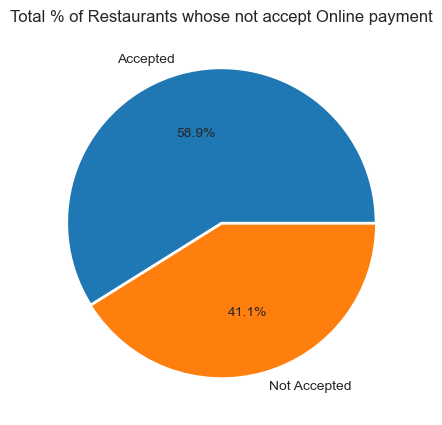

In [67]:
plt.figure(figsize=(8,5))
plt.pie(df.online_order.value_counts(), labels=['Accepted','Not Accepted'], explode=[0.0, 0.01], autopct='%1.1f%%')
plt.title("Total % of Restaurants whose not accept Online payment")
plt.show()

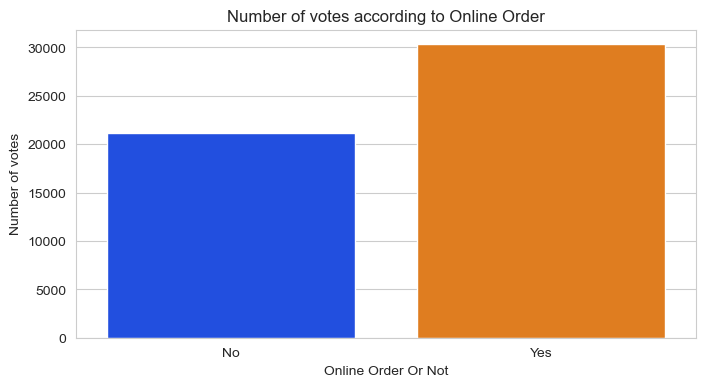

In [68]:
onlineorder_rating = df.groupby('online_order')['votes'].count()
plt.figure(figsize=(8,4))
sns.barplot(x=onlineorder_rating.index,y=onlineorder_rating.values, palette='bright')
plt.title("Number of votes according to Online Order")
plt.xlabel('Online Order Or Not')
plt.ylabel('Number of votes')
plt.show()

* Customers who order online are more likely to give ratings to restaurants compared to those who do not order online.

How Many Restaurants have table booking facilities and Rating according to Booking

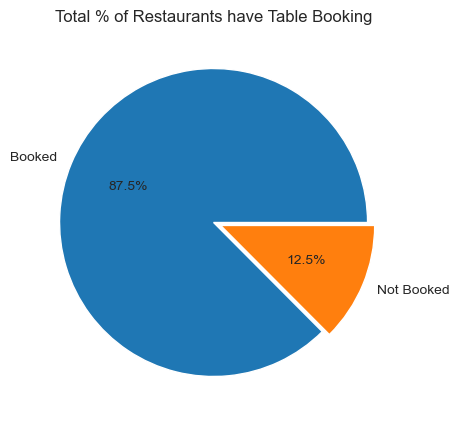

In [160]:
plt.figure(figsize=(8,5))
plt.pie(df.book_table.value_counts(), labels=['Booked','Not Booked'], explode=[0.0, 0.05], autopct='%1.1f%%')
plt.title("Total % of Restaurants have Table Booking")
plt.show()

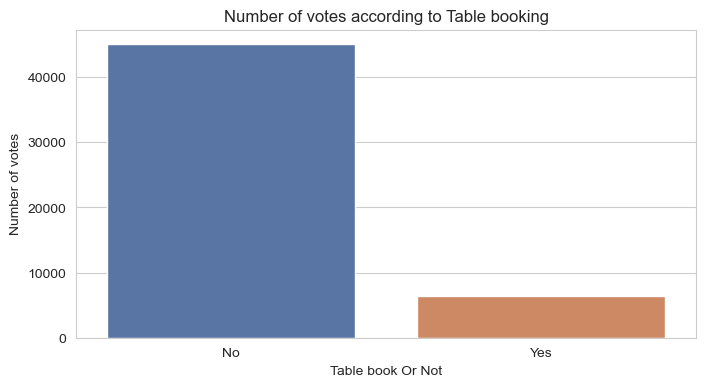

In [74]:
tablebook_rating = df.groupby('book_table')['rate'].count()
plt.figure(figsize=(8,4))
sns.barplot(x=tablebook_rating.index,y=tablebook_rating.values, palette='deep')
plt.title("Number of votes according to Table booking")
plt.xlabel('Table book Or Not')
plt.ylabel('Number of votes')
plt.show()

* Customers who book tables at restaurants are less likely to give ratings compared to those who do not book tables.

Find Resturants Type

In [76]:
df.rest_type.value_counts()

rest_type
Quick Bites                   19129
Casual Dining                 10326
Cafe                           3732
Delivery                       2595
Dessert Parlor                 2262
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

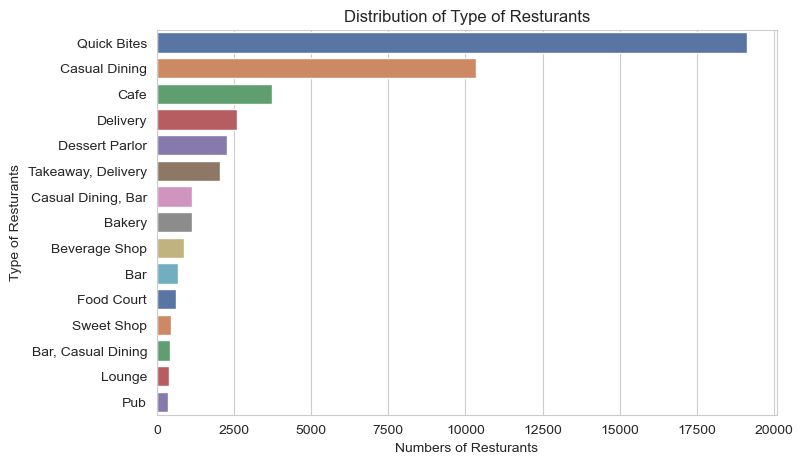

In [78]:
top_rest_type = df.rest_type.value_counts()[0:15]
plt.figure(figsize=(8,5))
sns.barplot(x=top_rest_type.values, y=top_rest_type.index, palette='deep')
plt.title('Distribution of Type of Resturants')
plt.xlabel('Numbers of Resturants')
plt.ylabel('Type of Resturants')
plt.show()

* According to the boxplot, most restaurants are Quick Bites. This suggests that customers prefer Quick Bites type restaurants.

In [84]:
# Get the top 15 most common rest types
top_15_rest_types = df['rest_type'].value_counts().iloc[:15].index

# Filter the DataFrame to include only the top 15 rest types
filtered_df = df[df['rest_type'].isin(top_15_rest_types)]

# Group by rest_type and count the number of ratings
rest_type_rating = filtered_df.groupby('rest_type')['rate'].count()

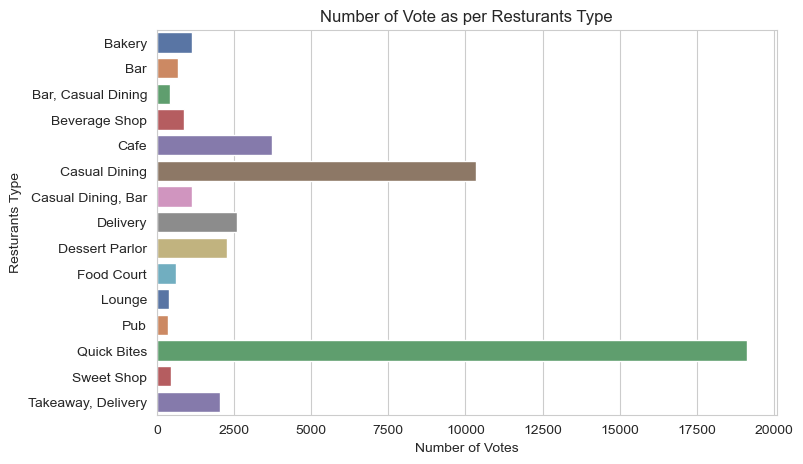

In [158]:
plt.figure(figsize=(8,5))
sns.barplot(y=rest_type_rating.index , x=rest_type_rating.values, palette='deep')
plt.title('Number of Vote as per Resturants Type')
plt.ylabel('Resturants Type')
plt.xlabel('Number of Votes')
plt.show()

* Quick Bites type restaurants have received the maximum votes.

In [88]:
voting = df.groupby('name')['votes'].mean()

In [90]:
voting

name
#FeelTheROLL                                      7.000
#L-81 Cafe                                       48.000
#Vibes Restro                                     0.000
#refuel                                          37.000
'Brahmins' Thatte Idli                            0.000
                                                 ...   
late100                                           0.000
nu.tree                                         180.375
re:cess - Hilton Bangalore Embassy GolfLinks    146.000
repEAT Hub                                        0.000
sCoolMeal                                         0.000
Name: votes, Length: 8755, dtype: float64

In [92]:
high_voting = voting[voting>5000]

In [94]:
high_voting

name
Arbor Brewing Company                      8396.545455
Big Pitcher                                9164.500000
Brew and Barbeque - A Microbrewery Pub     5868.200000
Byg Brewski Brewing Company               16588.500000
Church Street Social                       7561.727273
Fenny's Lounge And Kitchen                 6370.214286
Hard Rock Cafe                             5276.583333
Hoot                                       7257.000000
Prost Brew Pub                             7860.900000
TBC Sky Lounge                             6745.000000
The Black Pearl                            9562.333333
The Hole in the Wall Cafe                  7124.875000
Toit                                      14956.000000
Truffles                                   7001.372093
Vapour Pub & Brewery                       6952.500000
Windmills Craftworks                       5928.800000
Name: votes, dtype: float64

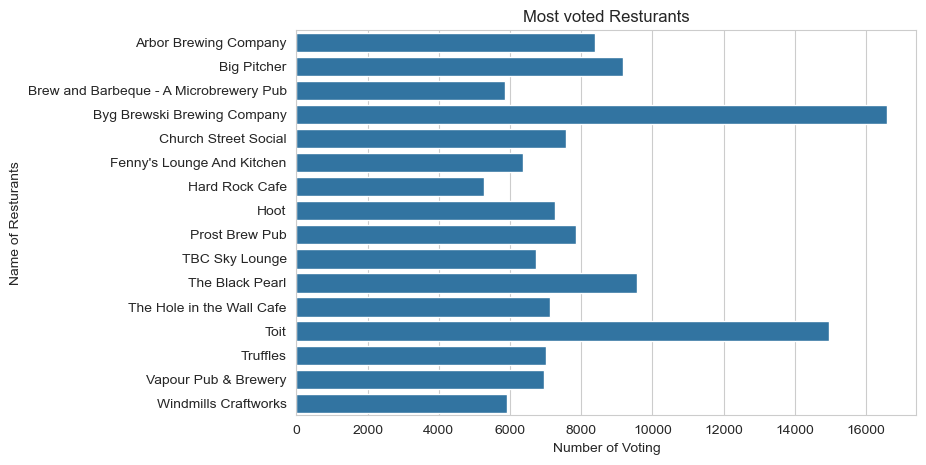

In [96]:
plt.figure(figsize=(8,5))
sns.barplot(y= high_voting.index, x= high_voting.values)
plt.title('Most voted Resturants')
plt.xlabel('Number of Voting')
plt.ylabel('Name of Resturants')
plt.show()

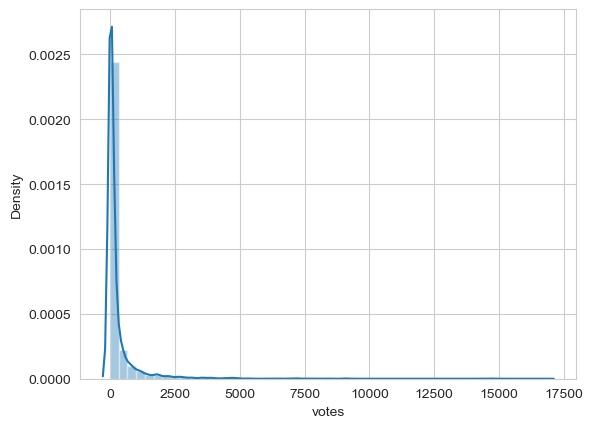

In [98]:
sns.distplot(df['votes'])
plt.show()

In [100]:
voting_rating = pd.merge(voting,df[['rate','name']], on='name', how='right')

In [102]:
top_vote = voting_rating[voting_rating['votes'] > 5000 ]

In [104]:
top_vote.head()

,name,votes,rate
3744,The Black Pearl,9562.333333,4.8
3903,Byg Brewski Brewing Company,16588.500000,4.9
4112,Hoot,7257.000000,4.2
4773,The Black Pearl,9562.333333,4.8
4774,Byg Brewski Brewing Company,16588.500000,4.9


In [106]:
top_vote = top_vote.groupby('name')['rate'].mean().sort_values(ascending = False)

In [108]:
top_vote

name
Byg Brewski Brewing Company               4.900000
The Black Pearl                           4.727778
TBC Sky Lounge                            4.700000
Toit                                      4.700000
Big Pitcher                               4.650000
Brew and Barbeque - A Microbrewery Pub    4.620000
The Hole in the Wall Cafe                 4.600000
Windmills Craftworks                      4.600000
Truffles                                  4.595349
Fenny's Lounge And Kitchen                4.521429
Arbor Brewing Company                     4.500000
Hard Rock Cafe                            4.500000
Prost Brew Pub                            4.500000
Church Street Social                      4.300000
Hoot                                      4.200000
Vapour Pub & Brewery                      4.200000
Name: rate, dtype: float64

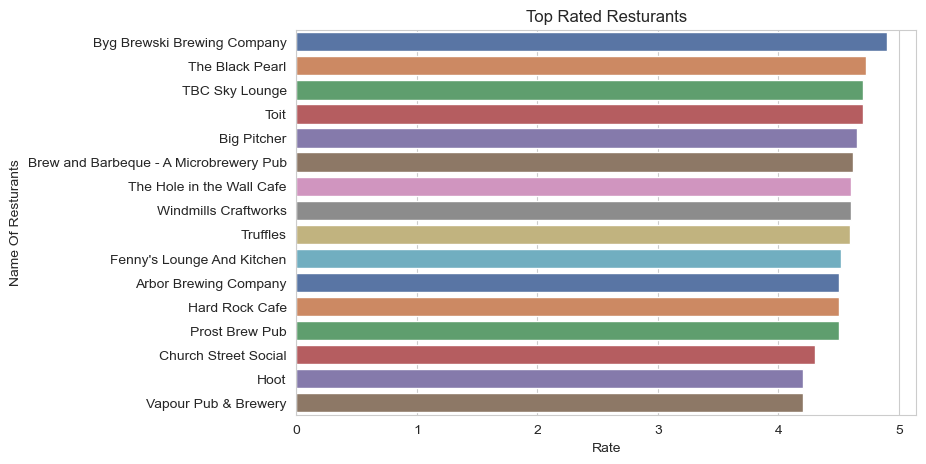

In [110]:
plt.figure(figsize=(8,5))
sns.barplot(x= top_vote.values, y= top_vote.index, palette='deep')
plt.title('Top Rated Resturants')
plt.xlabel('Rate')
plt.ylabel('Name Of Resturants')
plt.show()

* The top-rated restaurant with the maximum number of votes is Byg Brewski Brewing Company.

In [113]:
bad_rest = voting_rating[(voting_rating['rate']<3) & (voting_rating['votes']>200)]

In [115]:
bad_rest = bad_rest.groupby('name')['rate'].mean().sort_values().head(15)

In [117]:
bad_rest

name
Alibi - Maya International Hotel    1.800000
Fusion Lounge                       2.000000
Decker's Lane                       2.100000
Bageecha                            2.150000
Mamma Mexicana                      2.200000
Tandoor Hut                         2.200000
Meghana Biryani                     2.300000
Biryani Junction                    2.300000
Mast Kalandar                       2.376667
Punjabi Daawat                      2.400000
Woody's                             2.480000
Dal Tadkaa                          2.500000
Grills & Rolls                      2.500000
Madurai Idly Shop                   2.525000
The Bawarchi                        2.587500
Name: rate, dtype: float64

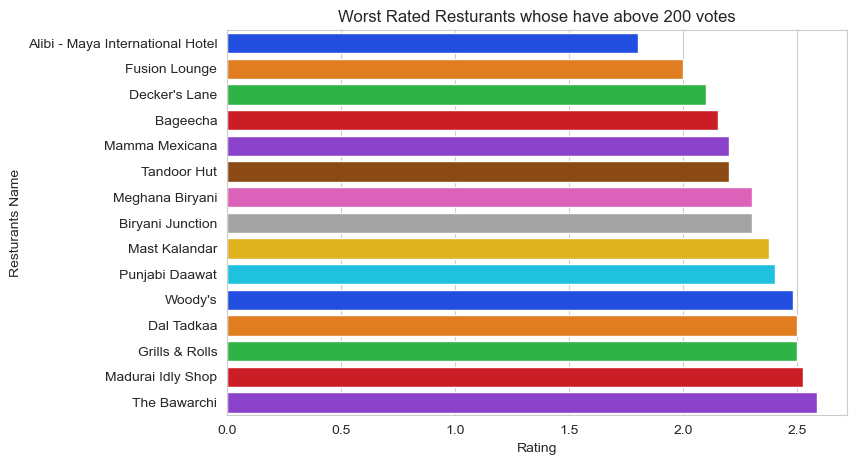

In [156]:
plt.figure(figsize=(8,5))
sns.barplot(x= bad_rest.values, y= bad_rest.index, palette='bright')
plt.title('Worst Rated Resturants whose have above 200 votes')
plt.ylabel('Resturants Name')
plt.xlabel('Rating')
plt.show()

* The worst-rated restaurant with over 200 votes is Alibi - Maya International Hotel.

In [127]:
location_rest = df['location'].value_counts()[:20]

In [129]:
location_rest

location
BTM                      5097
HSR                      2511
Koramangala 5th Block    2504
JP Nagar                 2222
Whitefield               2120
Indiranagar              2076
Jayanagar                1924
Marathahalli             1825
Bannerghatta Road        1624
Bellandur                1271
Electronic City          1249
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1141
Sarjapur Road            1057
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              904
Name: count, dtype: int64

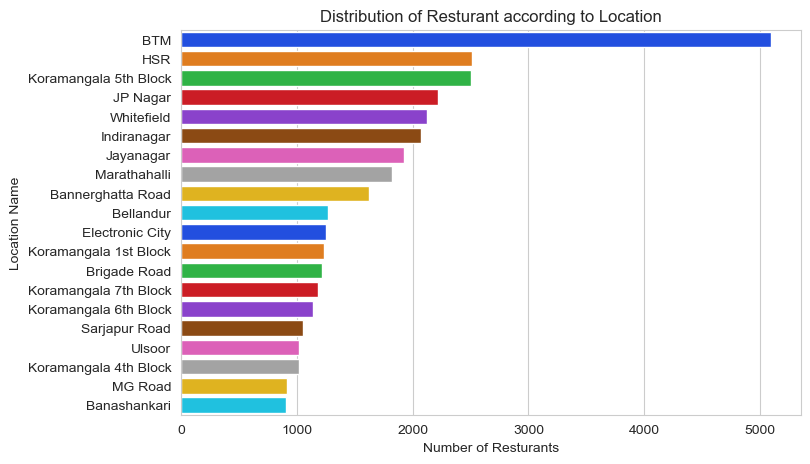

In [131]:
plt.figure(figsize=(8,5))
sns.barplot(y= location_rest.index, x= location_rest.values, palette='bright')
plt.title('Distribution of Resturant according to Location')
plt.ylabel('Location Name')
plt.xlabel('Number of Resturants')
plt.show()

* Maximum number of resturants are located in BTM

In [134]:
cuisines = df.cuisines.value_counts()[:15]

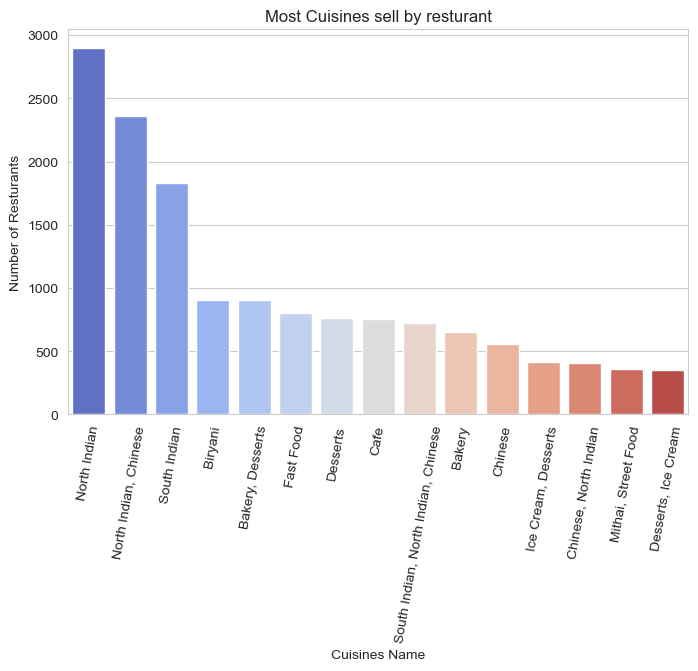

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(y=cuisines.values, x=cuisines.index, palette='coolwarm')
plt.xticks(rotation= 80)
plt.title('Most Cuisines sell by resturant')
plt.xlabel('Cuisines Name')
plt.ylabel('Number of Resturants')
plt.show()

* The best-selling cuisines in Bengaluru are North Indian and Chinese.

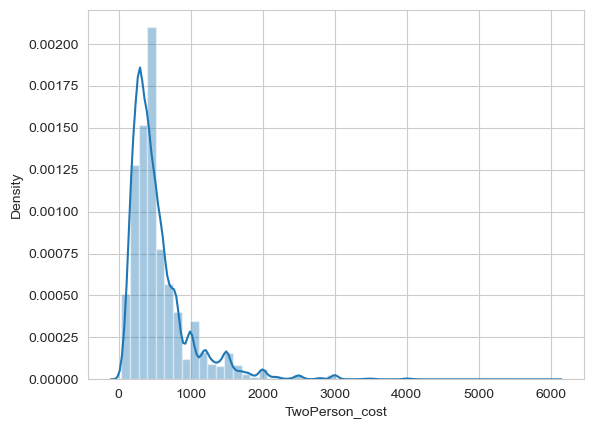

In [139]:
sns.distplot(df['TwoPerson_cost'])
plt.show()

* As per Distripution plote, Two person cost in most of resturants between 500 to 1000.

In [142]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'TwoPerson_cost', 'Listed_type',
       'list_Location'],
      dtype='object')

In [144]:
numeric_df = df[['rate', 'votes', 'TwoPerson_cost']]

In [146]:
corr_matrix = numeric_df.corr()

In [148]:
corr_matrix

,rate,votes,TwoPerson_cost
rate,1.000000,0.428242,0.365652
votes,0.428242,1.000000,0.380938
TwoPerson_cost,0.365652,0.380938,1.000000


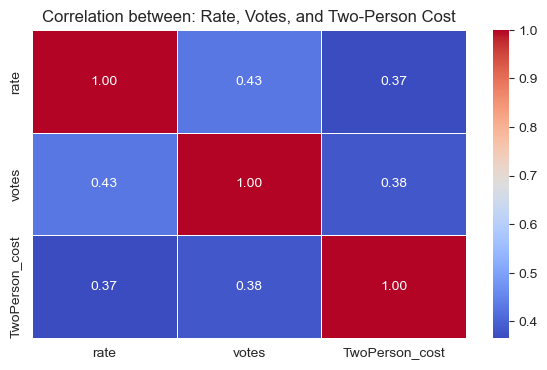

In [150]:
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between: Rate, Votes, and Two-Person Cost')
plt.show()

## Highlights -

1.Data Cleaning: The dataset was cleaned and irrelevant columns were removed.

2.Top Rated Restaurants: Identified top-rated restaurants based on customer ratings.

3.Cuisines Analysis: North Indian and Chinese cuisines were found to be the most popular.

4.Online Ordering Impact: Restaurants that accept online orders received more ratings.

5.Restaurant Types: Quick bites emerged as the most common restaurant type.

6.Location Insights: The highest concentration of restaurants is in BTM.

7.Cost Insights: Most restaurants have a two-person cost ranging between 500 to 1000. ## Key Insights -

a). Rating Trends: The average restaurant rating in Bengaluru is approximately 3.7, highlighting opportunities for enhancing customer satisfaction and service quality.

b). Online Ordering Impact: Restaurants offering online ordering services tend to attract more customer reviews, emphasizing the role of convenience in boosting customer engagement.

c). Popular Restaurant Types: Quick bites dominate the dining landscape, reflecting a growing preference for fast and casual dining options aligned with the city’s urban lifestyle.

d). Cuisine Preferences: North Indian and Chinese cuisines emerge as the most commonly served, showcasing the regional palate and popular food choices among Bengaluru's residents.

e). Location Insights: BTM Layout stands out as the area with the highest density of restaurants, signaling a vibrant food scene and potential for future business opportunities in the locality.

f). Pricing Patterns: Dining out in Bengaluru generally falls within a budget-friendly range, underlining the importance of affordability in attracting and retaining customers.

g). Underperforming Restaurants: Establishments like Alibi - Maya International Hotel, with low ratings despite significant customer feedback, highlight areas requiring quality improvements and better service management.